In [63]:
import jax
import jumanji
%matplotlib inline

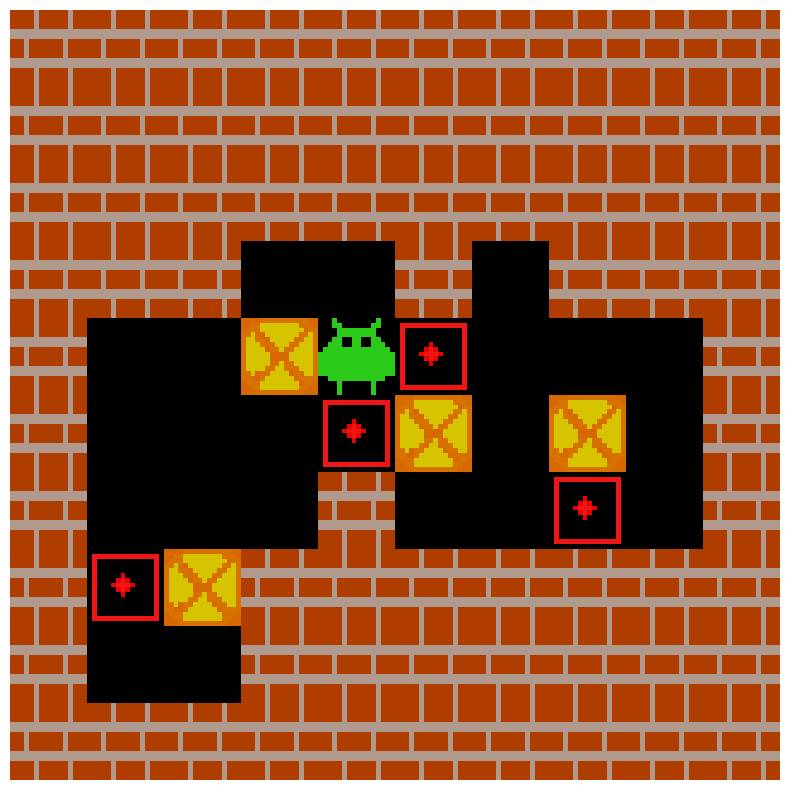

In [64]:
# Instantiate a Jumanji environment using the registry
env = jumanji.make('Sokoban-v0')

# Reset your (jit-able) environment
key = jax.random.PRNGKey(0)
state, timestep = jax.jit(env.reset)(key)

# (Optional) Render the env state
env.render(state)

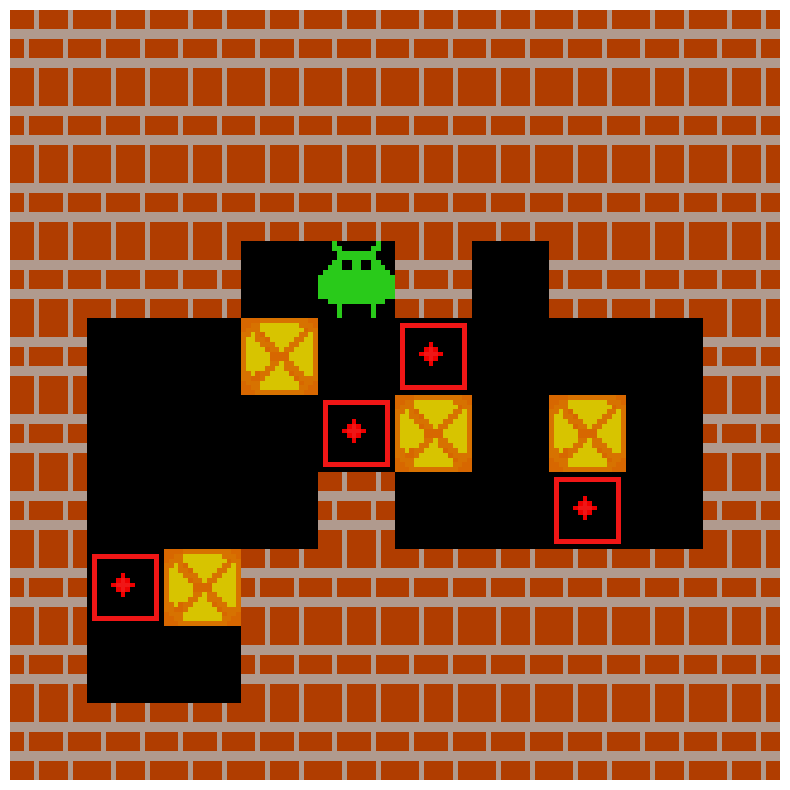

In [65]:
# Interact with the (jit-able) environment
action = env.action_spec.generate_value()          # Action selection (dummy value here)
state, timestep = jax.jit(env.step)(state, action)

# (Optional) Render the env state
env.render(state)

In [66]:
state

State(key=Array([4165894930,  804218099], dtype=uint32), fixed_grid=Array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 2, 0, 0, 0, 1],
       [1, 0, 0, 0, 2, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 2, 0, 1],
       [1, 2, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8), variable_grid=Array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8), agent_location=Array([3, 4], dtype=int32), step_count=Array(1, dtype=int32))

Steps needed: 39


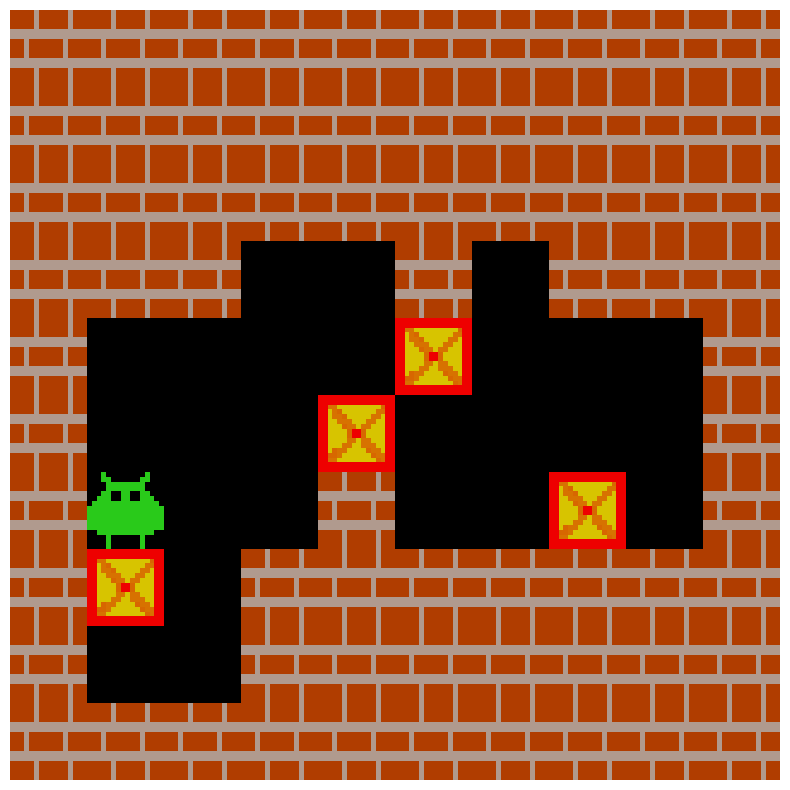

In [67]:
env = jumanji.make('Sokoban-v0')
key = jax.random.PRNGKey(0)
state, timestep = jax.jit(env.reset)(key)

UP, RIGHT, DOWN, LEFT  = 0, 1, 2, 3 
def doMultipleSteps(startState, steps):
    lastState = startState
    for step in steps:
        lastState, _ = jax.jit(env.step)(lastState, step)
    return lastState

episode = [RIGHT, RIGHT, RIGHT, DOWN, LEFT, LEFT, UP, LEFT, UP, LEFT, DOWN, LEFT, DOWN, DOWN, RIGHT, UP, LEFT, UP, RIGHT, RIGHT, LEFT, LEFT, LEFT, DOWN, DOWN, DOWN, DOWN, RIGHT, UP, LEFT, UP, UP, RIGHT, RIGHT, DOWN, LEFT, UP, LEFT, DOWN]
state = doMultipleSteps(state, episode)
env.render(state)

print("Steps needed:", len(episode))